# Simetrične matrice

Sadržaj:
- [Spektralne karakteristike simetričnih matrica](#Spektralne-karakteristike-simetričnih-matrica)
- [Pozitivna definitnost matrica](#Pozitivna-definitnost-matrica)
- [Uopšteni skalarni proizvod](Uopšteni-skalarni-proizvod)
- [Metod konjugovanih gradijenata](#Metod-konjugovanih-gradijenata)

Simetrične matrice su kvadratne matrice sa svojstvom $A=A^T.$ Zbog toga se i fundamentalni potprostori simetrične matrice ponavljaju:
$$
\mathcal{R}(A)\stackrel{A=A^T}{=}\mathcal{R}(A^T),\hspace{2cm}    
\mathcal{N}(A)\stackrel{A=A^T}{=}\mathcal{N}(A^T) .
$$
Osim toga, simetrične matrice se lepo slažu sa standardnim skalarnim proizvodom.
$$v\cdot(Au)=v^TAu\stackrel{A=A^T}{=}v^TA^Tu=(Av)^Tu=(Av)\cdot u.$$
Ova osobina je osnova svih geometrijskih svojstava simetričnih matrica. Jedno od njih je da su simetrične matrice u tesnoj vezi sa ortogonalnošću preko svojih sopstvenih vektora.

**Primer 1.** Zbir dve simetrične matrice je ponovo simetrična matrica. Zaista, 
$$A=A^T,\quad B=B^T\quad\Longrightarrow\quad (A+B)^T=A^T+B^T=A+B.$$

**Zadatak 1.** Proizvod dve simetrične matrice $A$ i $B$ je simetrična matrica akko $A$ i $B$ komutiraju među
sobom. Dokazati.

**Rešenje :**

$$(AB)^T=B^TA^T=BA=AB.$$

**Zadatak 2.** Pokazati: ako je $A$ simetrična matrica, onda je takva i matrica $A^2.$ Uopštiti ovo tvrđenje.

**Rešenje :**

$$(A^2)^T = (AA)^T = A^TA^T =(A^T)^2 = A^2.$$
Uopštenje: ako je $A$ simetrična matrica onda je i $A^n,\ n\in\mathbb{N}$ simetrična matrica.
Dokaz je posledica osobine $(AB)^T=B^TA^T.$ Zboog toga je $(A_1A_2\cdots A_n)^T=A_n^T\cdots A_2^TA_1^T.$
Odatle je 
$$(A^n)^T=(A^T)^n\stackrel{A^T=A}{=}A^n.$$

## Spektralne karakteristike simetričnih matrica

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt
import scipy.linalg as spl
from timeit import default_timer as timer

Podsetimo se osnovnih pojmova spektralne teorije kvadratnih matrica. Za kvadratnu matricu $A\in\mathcal{M}_{n\times n}$ jednakost 
$$Av=\lambda v,\ v\neq\theta,$$ definiše sopstveni vektor $v$ koji odgovara sopstvenoj  vrednosti $\lambda.$ Skup svih sopstvenih vrednosti matrice $A$ zovemo spektar te matrice i označavamo ${\rm Sp}(A).$

Sopstvene vrednosti matrice $A$ su nule njenog karakterističnog polinoma $P_A(\lambda)=\det(A-\lambda I).$ Zbog toga, matrica je regularna akko $0\not\in{\rm Sp}(A).$ Sopstvene vrednosti regularne matrice $A$ i njene inverzne matrice $A^{-1}$ su povezane:
$$\lambda\in{\rm Sp}(A)\quad\Longrightarrow\quad \dfrac{1}{\lambda}\in{\rm Sp}(A^{-1}).$$

**Teorema 1.** Teorema o spektralnom preslikavanju:

Neka je $f(x)$ neki polinom i $A$ kvadratna matrica. Ukoliko je $u_{\lambda}$ sopstveni vektor koji odgovara sopstvenoj vrednosti $\lambda$ matrice $A,$ tada je $u_{\lambda}a$ sopstveni vektor koji odgovara sopstvenoj vrednosti $f(\lambda)$ matrice $f(A).$

**Primer 2.** Karakteristični polinom matrice, njene sopstvene vrednosti i sopstvene vektore potražićemo ugrrađenim funkcijama NumPy biblioteke.

In [2]:
A=np.array([[1,-1,0],[2,-1,0],[0,1,5]])
q=np.poly(A)   #određivanje karakterističnog polinoma matrice A
q

array([ 1., -5.,  1., -5.])

Spektar matrice dobijamo pozivom naredbe `linalg.eigvals`.

In [3]:
spektar=np.linalg.eigvals(A)
spektar

array([ 5.00000000e+00+0.j, -9.71445147e-17+1.j, -9.71445147e-17-1.j])

Spektar i odgovarajuće sopstvene vektore vraća naredba `linalg.eig`.

In [4]:
spek, vektori=np.linalg.eig(A)
np.round(spektar,3)

array([ 5.+0.j, -0.+1.j, -0.-1.j])

In [5]:
np.round(vektori,3)

array([[ 0.   +0.j   ,  0.403+0.403j,  0.403-0.403j],
       [ 0.   +0.j   ,  0.806+0.j   ,  0.806-0.j   ],
       [ 1.   +0.j   , -0.155-0.031j, -0.155+0.031j]])

Kolone matrice predstavljaju normirane sopstvene vektore.

In [6]:
np.round(A@vektori-vektori@np.diag(spek),3)

array([[ 0.+0.j,  0.+0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.-0.j],
       [ 0.+0.j, -0.+0.j, -0.-0.j]])

**Definicija 1.** Za matricu $A$ spektralni radijus (poluprečnik), u oznaci $\rho(A)$ je
    $$\rho(A)=\max\big\{|\lambda|\ \big|\ \lambda\in{\rm Sp}(A)\big\}.$$

Spektralni radijus predstavlja poluprečnik centralne kružnice (kružnice sa centrom u koordinatnom početku kompleksne ravni) koja obuhvata sve sopstvene vrednosti matrice $A.$ Kružnica $K_{\rho(A)}=\big\{|z|\ \big|\ |z|\leq\rho(A)\big\}$ naziva se spektralna kružnica matrice $A.$
<div>
   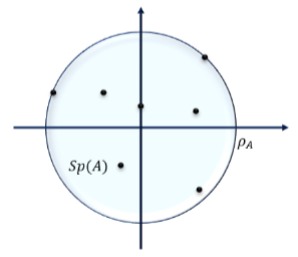  
</div>    

Za matricu iz primera 1 spektralni radijus možemo da potražimo kao maksimum modula elemenata niza sopstvenih vrednosti. 

In [7]:
ro=np.max(np.abs(spektar))
ro

5.0

**Teorema 2.** Simetrična matrica ima isključivo realne sopstvene vrednosti.
$$A=A^T\quad\Longrightarrow\quad {\rm Sp}(A)\subset\mathbb{R}$$

Za simetričnu matricu spektralni radijus definiše segment $[-\rho,\rho]$ u kome leže sve sopstvene vrednosti ove matrice.Bar jedna od granica tog segmenta je sopstvena vrednost te matrica. Ona je najveća po apsolutnoj vrednosti.

<div>
   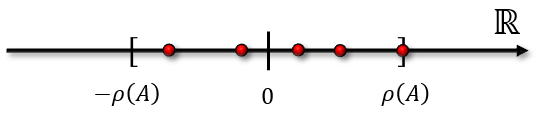  
</div>

**Primer 3.** Neka je $A\in\mathcal{M}_{m\times n}$ proizvoljna realna matrica. Tada je Gramova matrica $A^TA$ simetrična i ima isključivo realne sopstvene vrednosti. Neka su $v$ i $\lambda$ sopstveni par Gramove matrice $A^TA,$ tj. važi $A^TAv=\lambda v.$ Tada je
$$(Av)^T(Av)=v^T(A^TAv)=\lambda v^Tv\ \Longleftrightarrow\ \|Av\|^2=\lambda \|v\|^2\ \Longrightarrow\ \lambda\geq0.$$
Zaključujemo da je Gramova matrica uvek sa nenegativnim sopstvenim vrednostima. Kada je $A$ punog ranga kolona, Gramova matrica $A^TA$ je regularna, pa ne može imati $0$ u svom spektru. Takva Gramova matrica je sa svim pozitivnim sopstvenim vrednostima.

**Lema 1.** 	Neka su $v_1$ i $v_2$ sopstveni vektori simetrične matrice $A$ koji odgovaraju različitim sopstvenim vrednostima $\lambda_1$ i $\lambda_2.$ Tada su $v_1$ i $v_2$ ortogonalni vektori. 

**Teorema 3.** Teorema o glavnim osama simetrične matrice: 

Realna matrica $A$ je simetrična akko se može dijagonalizirati posredstvom ortogonalne matrice. Drugim rečima, postoje ortogonalna matrica $Q$ i dijagonalna matrica $D$ tako da važi
	$$A=QDQ^T.$$
    
Kolone ortogonalne matrice $Q$ iz spektralne dekmpozicije  $A=QDQ^T$ predstavljaju bazu ortonormiranih sopstvenih vektora matrice $A.$ Ove vektore nazivamo glavne ose matrice $A.$   

$$A=QDQ^T
=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
q_1&q_2&\dots&q_n\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\begin{bmatrix} \lambda_1&0&\dots&0\\0&\lambda_2&\dots&0\\&&\ddots&\\0&0&\dots&\lambda_n\end{bmatrix}
\begin{bmatrix} \underline{\phantom{WW}q_1^{T^{\phantom{I}}}\phantom{WW}}\\ \underline{\phantom{WW}q_2^{T^{\phantom{I}}}\phantom{WW}}\\[3pt]\underline{\phantom{WWI}\vdots\phantom{IWW}}\\
\phantom{W}q_n^{T^{\phantom{I}}}\phantom{W}\end{bmatrix}$$

**Primer 4.** Potražićemo sopstvene vrednosti i sopstvene vektore slučajno generisane simetrične matrice. To obavlja ugrađena funkcija `linalg.eigh`.

In [8]:
n=5
A=rndm.randn(n,n)
A=A+A.T
A

array([[ 1.85038608, -1.75356162,  0.12458883, -0.89931336, -1.06730864],
       [-1.75356162, -0.58229924,  0.58904603,  0.59753668,  0.39232184],
       [ 0.12458883,  0.58904603,  1.14499487, -2.23173335,  1.40074779],
       [-0.89931336,  0.59753668, -2.23173335, -3.00321077, -2.26640155],
       [-1.06730864,  0.39232184,  1.40074779, -2.26640155, -3.97270875]])

In [9]:
spec, Q=np.linalg.eigh(A)
print(spec)
print(Q)

[-6.09884324 -3.01240789 -1.38762465  2.88815618  3.04788178]
[[ 0.1539775   0.12580849  0.44562948  0.15598983 -0.85880422]
 [-0.08006038  0.27292391  0.83870991  0.01778719  0.46406052]
 [ 0.0594721  -0.53350736  0.08993573  0.82880531  0.1297162 ]
 [ 0.64572062 -0.5726837   0.22144874 -0.44920849  0.06519542]
 [ 0.74120794  0.54505783 -0.20211894  0.294354    0.16132702]]


In [10]:
np.round(A@Q-Q@np.diag(spec),3)

array([[-0., -0., -0., -0., -0.],
       [ 0., -0.,  0., -0.,  0.],
       [-0., -0.,  0., -0.,  0.],
       [-0., -0.,  0.,  0.,  0.],
       [-0.,  0., -0.,  0.,  0.]])

Ukoliko je potreban samo vektor sopstvenih vrednosti simetrične matrice možemo ga dobiti pozivom ugrađene funkcije `linalg.eigvalsh`.

In [11]:
spec=np.linalg.eigvalsh(A)
spec

array([-6.09884324, -3.01240789, -1.38762465,  2.88815618,  3.04788178])

**Posledica 1.** 	Neka je $A\in\mathcal{M}_{n\times n}$ realna simetrična matrica čije su sopstvene vrednosti 
$${\rm Sp}(A)=\{\lambda_1,\dots,\lambda_n\},$$ 
i odgovarajući ortonormirani sopstveni vektori $q_1,\dots,q_n,$ baza prostora $\mathbb{R}^n,$ tako da važi 
$$Aq_i=\lambda_iq_i.$$ Tada je
$$A=\lambda_1q_1q_1^T+\dots+\lambda_nq_nq_n^T=\lambda_1P_1+\dots+\lambda_nP_n,$$
	gde su $P_i=q_iq_i^T$ projekcije na sopstveni potprostor $\mathcal{L}(q_i).$

Na osnovu posledice 1, za proizvoljan vektor $v\in\mathbb{R}^n$ njegova slika $Av$ predstavlja sumu ortogonalnih projekcija na glavne ose $q_k$ i istezanje ili kontrakciju odgovarajuće projekcije koeficijentom $\lambda_k.$  Takođe, slika $Av$ je
$$Av=\displaystyle\sum_{k=1}^n\lambda_kq_kq_k^Tv=\displaystyle\sum_{k=1}^n\lambda_k(q_k^Tv)q_k.$$
 te $\lambda_k(q_k^Tv)$ predstavlja koordinate vektora $Av$ u odnosu na bazu glavnih osa $q_k.$ 
 S obzirom da je skup $q_1,q_2,\dots,q_n$ ortonormirana baza, to su Furijeove koordinate.  Tada za njih važi uopštena Pitagorina teorema:
$$ \|Av\|^2=\displaystyle\sum_{k=1}^n(\lambda_kq_k^Tv)^2.$$

 Kada je vektor $v$ sa jedinične sfere $(\|v\|=1)$ njegove Furijeove koordinate $q_k^Tv$ opisuju kosinus uglova sa koordinatnim osama $q_k.$ Drugim rečima, važi
 $$\|v\|^2=1=\displaystyle\sum_{k=1}^n(q_k^Tv)^2=\displaystyle\sum_{k=1}^n\cos^2\angle(q_k,v),$$
 pa jednakost postaje
$$\|Av\|^2\stackrel{\|v\|=1}{=}\displaystyle\sum_{k=1}^n\lambda_k^2\cos^2\angle(q_k,v).$$
  

Uvedimo oznake 
 $$\lambda_{\min}=\min_{k}|\lambda_k|\quad\mbox{ i }\quad \lambda_{\max}=\max_{k}|\lambda_k|=\rho(A).$$
 Kada je $\lambda_{\min}>0$ zaključujemo da $0\not\in{\rm Sp}(A),$ tj. simetrična matrica $A$ je regularna. 
 Na osnovu poznavanje spektralne dekompozicije regularne simetrične matrice $A$ imamo i spektralnu dekompoziciju njene inverzne matrice:  $A^{-1}=QD^{-1}Q^T.$ Tada je 
$$\rho(A^{-1})=\max_{k}\dfrac{1}{|\lambda_k|}=\dfrac{1}{\lambda_{\min}}.$$
 
 <div>
   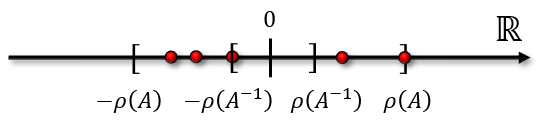  
</div>

 Na osnovu  toga zaključujemo da za jedinične vektore važi:
 \begin{align}
 \|Aq_k\|&=|\lambda_k|,\\ 	\|Av\|^2&\leq\displaystyle\sum_{k=1}^n\lambda_{\max}^2\cos^2\angle(q_k,v)
 =\lambda_{\max}^2\displaystyle\sum_{k=1}^n\cos^2\angle(q_k,v)=\lambda_{\max}^2=\rho(A)^2,\\ 	\|Av\|^2&\geq\displaystyle\sum_{k=1}^n\lambda_{\min}^2\cos^2\angle(q_k,v)
 =\lambda_{\min}^2\displaystyle\sum_{k=1}^n\cos^2\angle(q_k,v)
 =\lambda_{\min}^2\stackrel{\lambda_{\min}>0}{=}\dfrac{1}{\rho(A^{-1})^2}.
 \end{align}

 Dakle, važi nejednakost za slike jedinične sfere:
$$ \lambda_{\min}\leq\|Av\|\leq\lambda_{\max},\quad \forall v\in\mathbb{R}^n,\ \|v\|=1.$$
 Zbog toga, simetričnim linearnim preslikavanjem $v\to Av$ jedinična sfera  se slika u [elipsoid](https://en.wikipedia.org/wiki/Ellipsoid). 
 Preslikavanjem jedinične sfere vrši se njeno istezanje u elipsoid duž glavnih osa $q_k.$ 'Istezanje' je najveće duž glavne ose sa sopstvenom vrednošću $|\lambda|=\lambda_{\max}.$  Slično, 'kontrakcija' je najveća duž glavne ose sa $|\lambda|=\lambda_{\min}.$
 <div>
   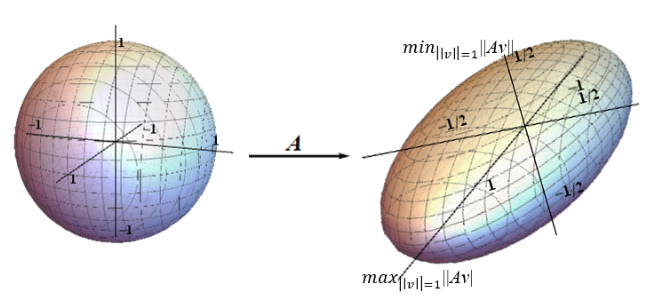  
</div>   


U slučaju singularne simetrične matrice dimenzija prostora slika umanjena je za višestrukost sopstvene vrednosti $\lambda=0,$ tj. za dimenziju jezgra. Jedinična sfera dimenzije $n$ se tada slika u elipsoid dimenzije $m<n.$

**Primer 5.** Za simetričnu matricu $A\in\mathcal{M}_{2\times2}$ proverićemo ove nejednakosti. 

In [12]:
A=rndm.randn(2,2)
A=A+A.T
A

array([[ 0.99975382, -1.37527766],
       [-1.37527766,  0.4050622 ]])

In [13]:
spek=np.linalg.eigvalsh(A)
la_max=np.max(np.abs(spek))
la_min=np.min(np.abs(spek))

Kreiraćemo niz jediničnih sopstvenih vektora. U prostoru $\mathbb{R}^2$ to su vektori oblika $\begin{bmatrix}\cos\theta\\\sin\theta\end{bmatrix}.$

In [14]:
teta=np.linspace(0,2*np.pi,50)
jedin_kruz=np.array([np.cos(teta),np.sin(teta)])

In [15]:
slike=A@jedin_kruz
norme_slika=np.linalg.norm(slike,axis=0)

In [16]:
np.all((la_min<=norme_slika) & (norme_slika<=la_max))

True

Možemo i grafički da proverimo sliku jedinične kružnice.

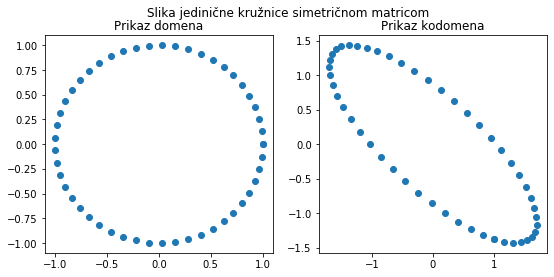

In [17]:
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Slika jedinične kružnice simetričnom matricom')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz domena")  
plt.plot(jedin_kruz[0],jedin_kruz[1],'o') 

plt.subplot(1, 2, 2)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz kodomena")  
plt.plot(slike[0],slike[1],'o') ;


**Primer 6.** Da bismo proveru iz prethodnog primera sproveli u 3D potrebno je poznavanje izraza jediničnih vektora u ovom prostoru. Za to su najpogodnije [sferne koordinate](https://en.wikipedia.org/wiki/Spherical_coordinate_system). Parametarska jednačina centralne sfere poluprečnika $r$ glasi:
$$\left\{\begin{array}{l}
x=x(\varphi,\theta)=r\cos(\theta)\sin(\varphi),\\
y=y(\varphi,\theta)=r\sin(\theta)\sin(\varphi),\\
z=z(\varphi,\theta)=r\cos(\varphi),
\end{array}\right.\qquad \varphi\in[0,\pi],\quad \theta\in[0,2\pi],$$

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [19]:
A=rndm.randn(3,3)
A=A+A.T+4*np.eye(3)
A

array([[ 3.50643118,  0.84873244, -0.63971692],
       [ 0.84873244,  6.49276288,  2.78129006],
       [-0.63971692,  2.78129006,  5.50607172]])

In [20]:
spek=np.linalg.eigvalsh(A)
la_max=np.max(np.abs(spek))
la_min=np.min(np.abs(spek))
print(la_min)
print(la_max)

2.288184989021495
8.83528354549803


In [21]:
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)

In [22]:
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(100), KosFi)
jed_sfera=np.array([x.reshape(10000,),y.reshape(10000,),z.reshape(10000,)])
slike=A@jed_sfera
Xs=(slike[0]).reshape(100,100)
Ys=(slike[1]).reshape(100,100)
Zs=(slike[2]).reshape(100,100)

In [23]:
norme_slika=np.linalg.norm(slike,axis=0)
np.all((la_min<=norme_slika) & (norme_slika<=la_max))

True

In [24]:
np.max(norme_slika)

8.834747860919666

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


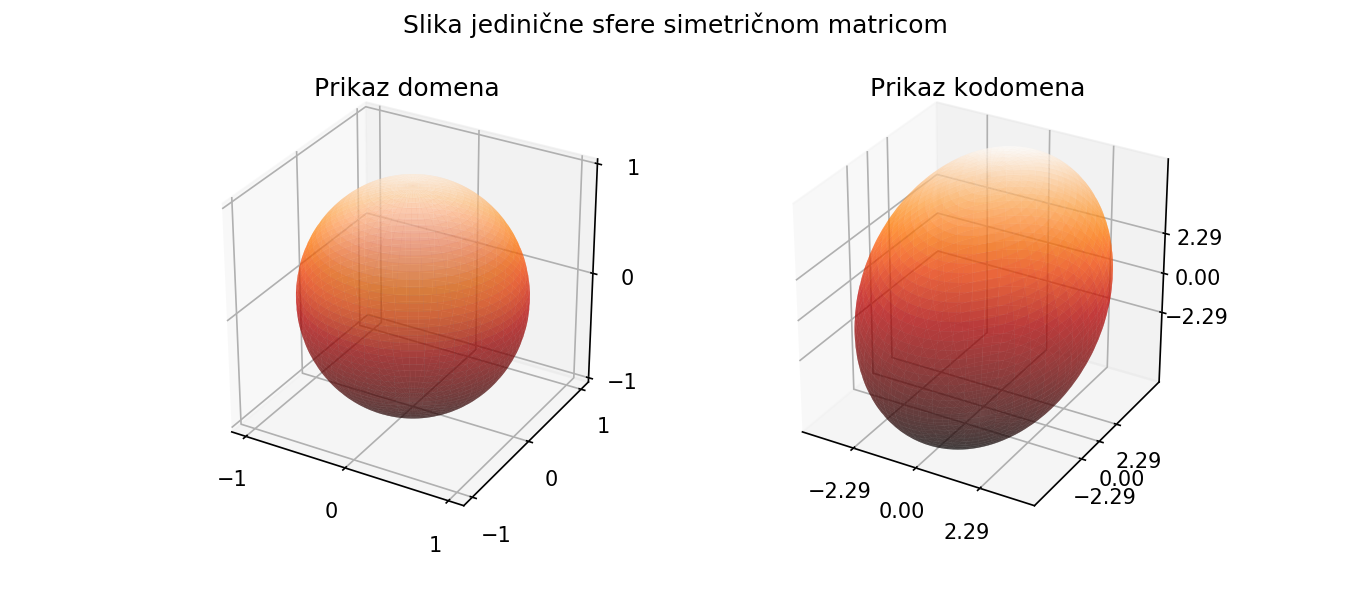

In [26]:
slika=plt.figure(figsize=(9,4)) 
slika.suptitle('Slika jedinične sfere simetričnom matricom')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 2, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
ax1.plot_surface(x, y, z , cmap=cm.gist_heat, alpha=0.5);

ax2 = slika.add_subplot(1, 2, 2, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-la_max,-la_min, 0,la_min, la_max])
ax2.set_yticks([-la_max,-la_min, 0,la_min, la_max])
ax2.set_zticks([-la_max,-la_min, 0,la_min, la_max])
ax2.plot_surface(Xs, Ys, Zs , cmap=cm.gist_heat, alpha=0.5);

plt.show()

In [27]:
%matplotlib inline

**Zadatak 3.** Dat je ortonormiran skup vektora $v_i,\ i = 1, 2, \dots, n.$ Neka je matrica $A\in\mathcal{M}_{n\times n}$ data sa $A =\displaystyle\sum_{i=1}^n\lambda_iv_iv_i^T,$ za neke skalare $\lambda_i\in\mathbb{R}.$ Dokazati da je $Av_i =\lambda_iv_i,\ i = 1, 2,\dots, n.$

**Rešenje :** 

Skup vektora $\{v_i\ |\ i=1,2,\dots,n\}$ je ortonormiran $\Longleftrightarrow\quad v_i^Tv_j=\begin{cases}0,&i\neq j\\ 1,&i=j.\end{cases}$ Tada je
$$Av_j=\left(\sum_{i=1}^n\lambda_iv_iv_i^T\right)v_j=\sum_{i=1}^n\lambda_iv_i(v_i^Tv_j)=\lambda_iv_i.$$

**Zadatak 4.** Naći ortogonalnu dijagonalizaciju sledećih matrica.

a) $A=\begin{bmatrix} 1&2&3&4\\ 2&1&2&3\\ 3&2&-1&-2\\4&3&-2&-1\end{bmatrix},\qquad$
b) $A=\begin{bmatrix} 0.23&0.49&1.31&-0.17\\ 0.49&1.14&-0.87&0.63\\
1.31&-0.87&1.21&0.57\\ -0.17&0.63&0.57&0.34\end{bmatrix}$

In [28]:
A=np.array([[1,2,3,4],[2,1,2,3],[3,2,-1,-2],[4,3,-2,-1.]])
spekA, QA=np.linalg.eigh(A)
DA=np.diag(spekA)
np.round(A-QA@DA@QA.T,3)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0.]])

In [29]:
B=np.array([[0.23,0.49,1.31,-0.17],[0.49,1.14,-0.87,0.63],[1.31,-0.87,1.21,0.57],[-0.17,0.63,0.57,0.34]])
spekB, QB=np.linalg.eigh(B)
DB=np.diag(spekB)
np.round(B-QB@DB@QB.T,3)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0.]])

## Pozitivna definitnost matrica

**Definicija 2** Neka su $A,B\in\mathcal{M}_{n\times n}$ simetrične matrice. Za $A$ i $B$ kažemo da su kongruentne matrice ako postoji regularna matrica $T\in\mathcal{M}_{n\times n}$ tako da je $A=TBT^T.$

**Teorema 4.** [Zakon inercije Silvestera](https://en.wikipedia.org/wiki/Sylvester%27s_law_of_inertia):

Dve simetrične matrice $A$ i $B$ su kongruentne akko imaju jednak broj pozitivnih sopstvenih vrednosti, jednak broj nula sopstvenih vrednosti, kao i jednak broj negativnih sopstvenih vrednosti.

**Posledica 1.**     Neka je $A=LDL^T$ poznata $LDU$ dekompozicija simetrične matrice $A.$ Matrice $A$ i $D$ imaju jednak broj pozitivnih, negativnih i nula-sopstvenih vrednosti. 

**Definicija 3.** Neka je $A$ realna kvadratna matrica reda $n.$
-	Matrica $A$ je pozitivno definitna ukoliko je  $v^TAv>0$ za svaki nenula vektor $v\in\mathbb{R}^n.$
- Matrica $A$ je pozitivno semidefinitna ukoliko je $v^TAv\geq0$ za svaki vektor $v\in\mathbb{R}^n.$
-	Matrica $A$ je negativno definitna ukoliko je  $v^TAv<0$ za svaki nenula vektor $v\in\mathbb{R}^n,$ tj. ako je matrica $-A$ pozitivno definitna.
-	Matrica $A$ je negativno semidefinitna ukoliko je $-A$ pozitivno semidefinitna.
- Ukoliko matrica $A$ nije niti pozitivno niti negativno semidefinitna, matrica je nedefinitna.

Primetimo da je svaka pozitivno definitna matrica istovremeno i pozitivno semidefinitna. Obrat u opštem slučaju ne važi. Negativna semidefinitnost i definitnost mogu se svesti na ispitivanje odgovarajuće pozitivne definitnosti matrice sa elementima suprotnog znaka, tj. suprotne matrice.

**Primer 7.** Jedinična matrica $I$ je pozitivno definitna: za $v\neq\theta$
	$$v^TIv=v^Tv=\|v\|_2>0.$$
    
Neka je data dijagonalna matrica $D={\rm diag}(d_1,d_2,\dots,d_n)$ i proizvoljan nenula vektor $v=\begin{bmatrix} \alpha_1&\alpha_2&\dots&\alpha_n\end{bmatrix}^T.$  Tada je
	$$v^TDv=d_1\alpha_1^2+d_2\alpha_2^2+\dots+d_n\alpha_n^2.$$
Pretpostavimo da je neki od dijagonalnih elemenata, npr. $d_1\leq0.$
Tada za odgovarajući vektor kanonske baze $e_1=\begin{bmatrix}1&0&\dots&0\end{bmatrix}^T$ važi: 
$$e_1^TDe_1=d_1\leq0.$$ 
Zaključujemo da je dijagonalna matrica $D$ pozitivno definitna akko su svi dijagonalni elementi $d_1,\dots,d_n$ pozitivne vrednosti. Matrica $D$ je pozitivno semidefinitna ukoliko je $d_1,d_2,\dots,d_n\geq0.$ Slični zaključci mogu se dobiti za negativnu definitnost i nedefinitnost dijagonalne matrice $D.$    

**Primer 8.** Ako su $A$ i $B$ kvadratne pozitivno definitne matrice iste dimenzije, tada je i matrica $A+B$ pozitivno definitna. Zaista,
$$v^T(A+B)v=v^TAv+v^TBv>0,\quad v\neq\theta.$$

Narednim primerima pokazaćemo zbog čega je izbor simetrične matrice najprirodniji za razmatranje pozitivne definitnosti.

**Primer 9.** Neka je $A_{KS}\in\mathcal{M}_{n\times n}$ realna koso-simetrična matrica i $v\in\mathbb{R}^n$ vektor. Tada je $v^TA_{KS}v=0.$ S obzirom da je $v^TA_{KS}v\in\mathbb{R}^n$ imamo da je
$$v^TA_{KS}v\stackrel{A_{KS}^T=-A_{KS}}{=}v^T(-A_{KS}^T)v=-v^TA_{KS}^Tv=-(v^TA_{KS}v)^T=-v^TA_{KS}v.$$
Dakle, za realan broj $a=v^TA_{KS}v$ va\v zi da je $a=-a.$ Sledi da je $v^TA_{KS}v=0.$

Neka je $A$ proizvoljna realna kvadratna matrica reda $n.$  Označimo $A_S=\dfrac{A+A^T}2$ simetričnu i $A_{KS}=\dfrac{A-A^T}2$ koso-simetričnu matricu za koje važi da je $A=A_S+A_{KS}.$ Kako je $v^TA_{KS}v=0$, to je za svaku realnu matricu $A\in\mathcal{M}_{n\times n}$
tačna jednakost
$$v^TAv=v^TA_Sv.$$

Zbog ove jednakosti, u nastavku kada budemo govorili o definitnosti matrica podrazumevaćemo da je analizirana matrica simetrična.

**Teorema 5.** Za realnu simetričnu  matricu $A\in\mathcal{M}_{n\times n},$ sledeća tvrđenja su ekvivalentna.

a) $v^TAv>0$ za sve nenula vektore $v\in\mathbb{R}^n.$

b) Sve sopstvene vrednosti  matrice $A$ su  pozitivne, tj. ${\rm Sp}(A)>0.$

v) Matrica $A$ je kongruentna sa jediničnom matricom $I\in\mathcal{M}_{n\times n}.$

g) 	$A = U^TU$ za neku regularnu matricu $U.$

d) $A$ se može predstaviti kao Gramova matrica linearno nezavisnog skupa vektora 
$$\{u_1, \dots, u_n\}\subset\mathbb{R}^m,\qquad A=\begin{bmatrix} u_1\cdot u_1&u_1\cdot u_2&\dots&u_1\cdot u_n\\
			u_2\cdot u_1&u_2\cdot u_2&\dots&u_2\cdot u_n\\
		\vdots	&\vdots& &\vdots\\ u_n\cdot u_1&u_n\cdot u_2&\dots&u_n\cdot u_n\end{bmatrix}.$$

đ) Matrica $A$ poseduje dekompoziciju Čoleskog (Kriterijum Čoleskog).

**Posledica 2.** Pozitivno definitna matrica je regularna matrica. Tada je i njoj inverzna matrica takođe pozitivno definitna.

**Primer 10.** Ispitaćemo definitnost trodijagonalne
	matrice $A=\begin{bmatrix} 3&-1&0\\ -1&3&-1\\ 0&-1&3\end{bmatrix}$ na više različitih načina koji su omogućeni teoremom 4.

In [30]:
A=np.array([[3,-1,0],[-1,3,-1],[0,-1,3]])

Potražićemo prvo najmanju vrednost izraza $v^TAv$ za vektore sa jedinične sfere.

In [31]:
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(100), KosFi)
jed_sfera=np.array([x.reshape(10000,),y.reshape(10000,),z.reshape(10000,)])
vAv=np.diag(jed_sfera.T@(A@jed_sfera))

In [32]:
np.min(vAv)

1.5858059181765134

Izračunavanjem spektra potvrđujemo da je matrica $A$ pozitivno definitna.

In [33]:
np.linalg.eigvalsh(A)

array([1.58578644, 3.        , 4.41421356])

In [34]:
spl.ldl(A)

(array([[ 1.        ,  0.        ,  0.        ],
        [-0.33333333,  1.        ,  0.        ],
        [ 0.        , -0.375     ,  1.        ]]),
 array([[3.        , 0.        , 0.        ],
        [0.        , 2.66666667, 0.        ],
        [0.        , 0.        , 2.625     ]]),
 array([0, 1, 2], dtype=int64))

In [35]:
spl.cholesky(A)

array([[ 1.73205081, -0.57735027,  0.        ],
       [ 0.        ,  1.63299316, -0.61237244],
       [ 0.        ,  0.        ,  1.62018517]])

**Zadatak 5.** Neka je $A\in\mathcal{M}_{n\times n}$ (simetrična) pozitivno  definitna matrica i $v_1,v_2,\dots,v_n\in\mathbb{R}^n$ nenula vektori za koje važi
$$v_i^TAv_j=0\qquad\mbox{ i }\qquad v_i^Tv_j=0\qquad \forall i\neq j.$$
Pokazati da su $v_i$ sopstveni vektori matrice $A.$

**Rešenje:**

Matrica $A$ je pozitivno definitna što znači $\forall i=1,2,\dots,n,\qquad v_i^TAv_i>0.$

Iz uslova ortogonalnosti $v_i^Tv_j=0\qquad \forall i\neq j,$ zaključujemo da su nenula vektori $v_i$ ortogonalna baza prostora $\mathbb{R}^n.$ Zbog toga slika $Av_j$ proizvoljnog vektora $v_j$ ove baze  može da se izrazi kao njihova linearna kombinacija:
$$Av_j=\lambda_1v_1+\lambda_2v_2+\dots+\lambda_nv_n.$$
Primenimo sada svojstvo $A-$konjugovanosti vektora $v_i,$ tj. primenimo na koordinatni razvoj $Av_j$ skalarni proizvod sa $v_i,\ i\neq j:$
$$v_i^TAv_j=0=\lambda_1v_i^Tv_1+\lambda_2v_i^Tv_2+\dots+\lambda_nv_i^Tv_n=\lambda_i\|v_i\|^2\quad\Longrightarrow\quad
\lambda_i=0.$$
S obzirom da ovo važi za svako $i\neq j,$ to je $Av_j=\lambda_jv_j.$ Dakle, $v_j$ zaista predstavlja sopstveni vektor.

**Zadatak 6.** Neka je $A$ koso-simetrična matrica. Pokazati da je tada $A^2$ simetrična negativno definitna
matrica.

**Rešenje :** 

\begin{align}
&A^T=-A\quad\Longrightarrow\quad (A^2)^T=(A^T)^2=(-A)^2=A^2\quad\Longrightarrow\quad A^2
\mbox{ je simetrična}\\
& v^TA^2v\stackrel{A=-A^T}{=}v^T(-A^TA)v=-v^TA^TAv=-(Av)^T(Av)=-\|Av\|^2<0
\quad\Longrightarrow\quad A^2 \mbox{ je negativno definitna}
\end{align}

**Zadatak 7.** Neka je A simetrična negativno definitna matrica. Pokazati da su tada svi glavni minori
parnog reda pozitivne, a svi glavni minori neparnog reda negativne vrednosti.

**Rešenje :**

$A$ je negativno definitna akko je $-A$ pozitivno definitna. Označimo sa $A_k$ glavni minor reda $k$ matrice $A$ i $(-A)_k$ glavni minor reda $k$ matrice $-A.$ Imajući u vidu
$${\rm det}(cM)=c^k{\rm det}(M),\quad M\in\mathcal{M}_{k\times k},$$
lako dobijamo
    $$A_k=(-1)^k(-A)_k\quad\Longrightarrow\quad {\rm sgn}(A_k)=\begin{cases}1,&k\equiv_20\\
    -1,&k\equiv_21\end{cases}.$$

## Uopšteni skalarni proizvod

Neka je $A\in\mathcal{M}_{n\times n}$ simetrična  pozitivno definitna matrica. Tada izraz 
$$ (v,u)_A=v^TAu,$$
    predstavlja uopšten realan skalarni proizvod  vektora iz $\mathbb{R}^n.$

Po ugledu na standardni skalarni proizvod, uopšteni skalarni proizvod  indukuje normu i ortogonalnost. Za naredne yadartke, primere, definicije i tvrđenja podrazumevaćemo da je $A\in\mathcal{M}_{n\times n}$ simetrična pozitivno definitna matrica.

**Zadatak 8.** Izračunati rastojanje vektora $u=\begin{bmatrix}1\\2\\-1\end{bmatrix}$ i $v=\begin{bmatrix}1\\1\\0\end{bmatrix}$ koristeći normu indukovnu 

a) standardnim skalarnim proizvodom $u^Tv$

b) skalarnim proizvodom $u^TAv,\quad A=\begin{bmatrix}2&1&0\\1&3&-1\\0&-1&2\end{bmatrix}.$

**Definicija 4.** $A-$norma vektora $v\in\mathbb{R}^n$ indukovana je $A-$skalarnim proizvodom, tj.
$$\|v\|_A=\sqrt{(v,v)_A}.$$
Vektor $v\in\mathbb{R}^n$ je $A-$normiran ukoliko je $v^TAv=1.$ 

**Rešenje :**

Za svaku normu indukovanu skalarnim proizvodom koristimo formulu za rastojanje
$$d(u,v)=\sqrt{\langle u-v,u-v\rangle}.$$

In [36]:
u=np.array([1,2,-1])
v=np.array([1,1,0])
A=np.array([[2,1,0],[1,3,-1],[0,-1,2]])

In [37]:
d=np.linalg.norm(v-u)
d

1.4142135623730951

In [38]:
dA=np.sqrt(np.dot(u-v,A@(u-v)))
dA

2.6457513110645907

**Zadatak 9.** Izračunati ugao između vektora $u=\begin{bmatrix}1\\2\end{bmatrix}$ i $v=\begin{bmatrix}-1\\1\end{bmatrix}$ koristeći za izračunavanje $\cos\angle(u,v)=\dfrac{\langle u,v\rangle}{\|u\|\,\|v\|},\quad \|u\|=\sqrt{\langle u,u\rangle}$ 

a) standardni skalarni proizvod $\langle u,v\rangle=u^Tv,$

b) skalarni proizvod $\langle u,v\rangle=u^TAv,\quad A=\begin{bmatrix}2&1\\1&3\end{bmatrix}.$

**Rešenje:**



In [39]:
u=np.array([1,2])
v=np.array([-1,1])
A=np.array([[2,1],[1,3]])

In [40]:
kos_uv=np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))
kos_uv

0.31622776601683794

In [41]:
v1=A@v
u1=A@u
kosA_uv=np.dot(u,v1)/(np.sqrt(np.dot(u,u1)*np.dot(v,v1)))
kosA_uv

0.408248290463863

**Definicija 5.**  Za dva vektora $u,v\in\mathbb{R}^n$ kažemo da su konjugovani u odnosu na $A$ ($A-$konjugovani ili $A-$ortogonalni) ukoliko je $$u^TAv{=}v^TAu=0.$$  	

Kada su $v$ i $u$ konjugovani, na osnovu osobine S2 skalarnog proizvoda sledi da su konjugovani i vektori $\alpha v$ i $\beta u$ za proizvoljne skalare $\alpha,\beta\in\mathbb{R}.$ Zbog  toga često govorimo o konjugovanim pravcima $\mathcal{L}(v)$ i $\mathcal{L}(u).$
	

Kao i u slučaju standardnog skalarnog proizvoda, $A-$ortogonalnost skupa nenula vektora $\{v_1,\dots,v_k\}$ znači njihovu linearnu nezavisnost.
$$v_i^TA\cdot\Big| \ \alpha_1v_1+\dots+\alpha_kv_k=\theta\ \stackrel{v_i^TAv_j=0,\ i\neq j}{\Longrightarrow} \ 
	\alpha_i(v_i,v_i)_A=0\ \stackrel{v_i\neq\theta}{\Longrightarrow}\ \alpha_i=0,\ i=1,\dots,k.$$
Dakle, $A-$konjugovanost skupa vektora možemo smatrati strožim uslovom od linearne nezavisnosti.u	

Uopšteni skalarni proizvod omogućava i Gram-Šmitov postupak $A-$ortonormiranja.  Od skupa linearno nezavisnih vektora $\{v_1,v_2,\dots,v_k\}$ možemo kreirati skup $A-$konjugovanih i $A-$normiranih vektora ($A-$orotonormiranih).
\begin{align}
	    u_1&=v_1,\qquad q_1=\dfrac{u_1}{\sqrt{u_1^TAu_1}}=\dfrac{u_1}{\|u_1\|_A}, \quad 
	    \|q_1\|_A=1,\\
	    u_2&=v_2-\lambda_1 q_1,\quad u_2^TAq_1=(q_1,u_2)_A=0\\
	    &\Longrightarrow\ \lambda_1=\dfrac{(q_1,v_2)_A}{(q_1,q_1)_A}=(q_1,v_2)_A,\\
	    u_2&=v_2-(q_1,v_2)_A q_1,\qquad q_2=\dfrac{u_2}{\|u_2\|_A},\\   
	    &\vdots\\
	    u_k&=v_k-\lambda_1q_1-\dots-\lambda_{k-1}q_{k-1},
	    \quad u_k^TAq_i=(q_i,u_k)_A=0,\quad  i=1,\dots,k-1,\\
	    &\Longrightarrow\ \lambda_i=\dfrac{(q_i,v_k)_A}{(q_i,q_i)_A}=(q_i,v_k)_A,\quad i=1,\dots,k-1,\\
	    u_k&=v_k-(q_1,v_k)_Aq_1-\dots-(q_{k-1},v_k)_Aq_{k-1},
	    \qquad q_k=\dfrac{u_k}{\|u_k\|_A}\,.
\end{align}

Samim tim i matrica $A-$projekcije na jednodimenzionalni potprostor $\mathcal{L}(v),\ v\in\mathbb{R}$ izračunava se sa 
$$P=\dfrac{vv^TA}{v^TAv}\,.$$ 

**Zadatak 10.** Za matricu $A=\begin{bmatrix}3&0&1\\0&4&2\\1&2&3\end{bmatrix}$ odrediti bazu $A-$ortonormiranih vektora.

**Rešenje:**

Proverimo najpre da li je matrica $A$ pozitivno definitna.

In [42]:
A=np.array([[3,0,1.],[0,4,2],[1,2,3]])
np.linalg.eigvalsh(A)>0

array([ True,  True,  True])

S obzirom da su sve sopstvene vrednosti pozitivne matrica $A$ jeste pozitivno definitna. Primenićemo Gram-Šmitov postupak $A-$ortonormiranja na kolone matrice $A.$ Prilagodićemo kod klasičnog QR algoritma za uopšteni skalarni proizvod.

In [43]:
_,n=A.shape
Q=np.copy(A)                           #inicjalizacija matrica faktora Q i R
R=np.zeros((n,n))
permutacija=np.arange(n)         #vektor za praćenje permutacija kolona
norme=np.sqrt(np.diag(Q.T@A@Q))    #izračunavanje normi vektora-kolona matrice A

for i in range(n):
    indeks=np.argmax(norme)             #određivanje indeksa kolone elementa sa najvećom normom
    permutacija[[i,i+indeks]]=permutacija[[i+indeks,i]] #upis permutacije
    norme[[0,indeks]]=norme[[indeks,0]]
    Q[:,[i,i+indeks]]=Q[:,[i+indeks,i]]   #dovođenje max vektora u prvu kolonu
    R[:i,[i,i+indeks]]=R[:i,[i+indeks,i]]   #prilagođavanje redosleda Furijeovih koordinata
    R[i,i]=norme[0]
    Q[:,i]=Q[:,i]/R[i,i]
    if i<n-1:
        R[i,i+1:]=Q[:,i]@(A@Q[:,i+1:])
        Q[:,i+1:]=Q[:,i+1:]-np.outer(Q[:,i],R[i,i+1:])
        norme=np.sqrt(norme[1:]**2-R[i,i+1:]**2) 
    
print("Q=",Q)
print("R=",R)
print(Q@R)
print(A[:,permutacija])

Q= [[ 0.          0.52789177 -0.34832496]
 [ 0.38490018 -0.13034365 -0.48462603]
 [ 0.19245009  0.1107921   0.7420836 ]]
R= [[10.39230485  1.9245009   8.08290377]
 [ 0.          5.68298305  2.89362898]
 [ 0.          0.          1.51445633]]
[[0. 3. 1.]
 [4. 0. 2.]
 [2. 1. 3.]]
[[0. 3. 1.]
 [4. 0. 2.]
 [2. 1. 3.]]


In [44]:
np.round(Q.T@A@Q,3)

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

**Zadatak 11.** Posmatramo prostor $\mathbb{R}^3$ sa skalarnim proizvodom $u^TAv,\quad A=\begin{bmatrix}2&1&-1\\1&2&-1\\-1&-1&2\end{bmatrix}.$ Neka $e_1,e_2,e_3$ predstavljaju vektore kanonske baze prostora $\mathbb{R}^3.$ U odnosu na dati skalarni proizvod obaviti naredne zadatake.

Odrediti ortogonalnu projekciju vektora $e_2$ na potprostor $U=\mathcal{L}\{e_1,e_3\}.$

**Rešenje:**

In [45]:
A=np.array([[2,1,-1.],[1,2,-1],[-1,-1,2]])
np.linalg.eigvalsh(A)>0

array([ True,  True,  True])

Odredićemo $A-$ortonormiranu bazu vektorskog prostora $U.$

In [46]:
I=np.eye(3)

In [47]:
u1=I[:,0]
d=np.sqrt(np.dot(u1,A@u1))
q1=u1/d
q1

array([0.70710678, 0.        , 0.        ])

In [48]:
u2=I[:,2]-(np.dot(I[:,2],A@q1))*q1
d=np.sqrt(np.dot(u2,A@u2))
q2=u2/d
q2

array([0.40824829, 0.        , 0.81649658])

Matrica $A-$projekcije na potprostor je zbir odgovarajućih $A$-elementarnih projekcija.

In [49]:
PU=(np.outer(q1,q1)+np.outer(q2,q2))@A
PU

array([[ 1.00000000e+00,  3.33333333e-01,  1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16, -3.33333333e-01,  1.00000000e+00]])

In [50]:
e2=I[:,1] 
Pe2=PU@e2  #projekcija na U
re2=e2-Pe2   #projekcija na U A-ortogonalno
np.round(Pe2@A@re2,3)

-0.0

**Primer 11.** 
	Neka je $q_1,\dots,q_n$ baza $A-$ortonormiranih vektora prostora $\mathbb{R}^n,$ tj. važi
$$(q_i,q_j)_A=q_i^TAq_j=\begin{cases}
	0, &i\neq j,\\
	1, &i=j.
	\end{cases}$$
Za vektor $v=\alpha_1q_1+\dots+\alpha_nq_n$ njegova $A-$norma jednaka je
\begin{align}
	\|v\|_A^2&=v^TAv=(\alpha_1q_1+\dots+\alpha_nq_n)^TA(\alpha_1q_1+\dots+\alpha_nq_n)\\
	&=\displaystyle\sum_{i,j=1}^n\alpha_i\alpha_j(q_i^TAq_j)=\displaystyle\sum_{i=1}^n\alpha_i\alpha_i(q_i^TAq_i)\\
	&=\alpha_1^2+\dots+\alpha_n^2.
	\end{align}
Drugim rečima, koordinate vektora u odnosu na $A-$ortonormiranu bazu predstavljaju $A-$Furijeove koordinate. Zbog toga očekujemo da  $A-$orotonormirana baza podržava još neke osobine minimalnosti koje smo upoznali kod Furijeovih koordinata.

 Jedna od primena uvedenih pojmova nalazi se u postupcima rešavanja sistema linearnih jednačina čija je matrica sistema realna, simetrična i pozitivno definitna.

**Primer 11.** 
	Neka je $A$ simetrična pozitivno definitna matrica i $v$ (jedinstveno) rešenje sistema linearnih jednačina $Ax=b,$ tj. $v=A^{-1}b.$ Tada je $x=v$ 'tačka' minimuma izraza po promenljivoj $x:$
\begin{align}
	\|(x-v)\|_A^2&=(x-v)^TA(x-v)\\
	&=x^TAx-x^TAv-v^TAx+v^TAv\\
	&{=}x^TAx-2x^TAv+v^TAv.
\end{align}
S obzirom da poslednji član $v^TAv$ ne zavisi od $x,$ zaključujemo da je vektor $v=A^{-1}b$ jedinstven vektor koji minimizira funkciju
$$f(x)=x^TAx-2x^TAv=x^TAx-2x^Tb=x^TAx-2b^Tx.$$

Neka je $q_1,\dots q_n,$ $A-$ortonormirana baza vektora u $\mathbb{R}^n,$ tj. važi da je
$$(q_i,q_j)_A=q_i^TAq_j=\begin{cases}
	0,&i\neq j,\\1,&i=j.
	\end{cases}$$
Predstavimo vektor $x$ koordinatama u ovoj bazi,
$$x=\alpha_1q_1+\dots+\alpha_nq_n.$$
Izraz funkcije $f(x)$ tada postaje:
\begin{align}
	    f(x)&=(\alpha_1q_1+\dots+\alpha_nq_n)^TA(\alpha_1q_1+\dots+\alpha_nq_n)-2b^T(\alpha_1q_1+\dots+\alpha_nq_n)\\
	    &=\displaystyle\sum_{i,j=1}^n\alpha_i\alpha_jq_i^TAq_j-2\displaystyle\sum_{i=1}^n\alpha_ib^Tq_i
	    =\displaystyle\sum_{i=1}^n\alpha_i^2-2\displaystyle\sum_{i=1}^n\alpha_ib^Tq_i\\
	    &=\displaystyle\sum_{i=1}^n\alpha_i(\alpha_i-2b^Tq_i).
\end{align}
Svaki od pojedinačnih sabiraka $\alpha_i(\alpha_i-2b^Tq_i),$ u poslednjem izrazu, zavisi isključivo od jedne koordinate $\alpha_i.$ Zbog toga će izraz za $f(x)$ biti minimalan kada je svaki od sabiraka $\alpha_i(\alpha_i-2b^Tq_i)$ minimalan. Iz realne analize poznato je da se minimum kvadratne funkcije $t(t-2a)$ dobija u temenu, tj. za $t=a.$
$$p(t)=t(t-2a)=t^2-2at\ \Longrightarrow\ p'(t)=2t-2a=0\ \Longrightarrow\ t_{\min}=a.$$
Zbog toga koordinate vektora $x$ koji minimizira funkciju $f$ glase $\alpha_i=b^Tq_i,$ pa je traženo rešenje minimizacionog problema i sistema jednačina $Ax=b$ dato sa
$$v=\displaystyle\sum_{i=1}^n(b^Tq_i)q_i.$$

Eksplicitni oblik rešenja pogodan je i za njegovo približno izračunavanje. Naime ukoliko su koeficijenti $b^Tq_i$ dovoljno bliski nuli počevši od nekog $i\geq m,$ tada nije potrebno računati baš celu sumu, niti baš sve konjugovane vektore $q_i.$ 
Dovoljno dobra aproksimacija rešenja može da bude i izraz
$$v=\displaystyle\sum_{i=1}^n(b^Tq_i)q_i\approx\displaystyle\sum_{i=1}^m(b^Tq_i)q_i.$$
To je ideja iza narednog iterativnog algoritma.

## Metod konjugovanih gradijenata

Prethodnim razmatranjem zaključili smo da postupak dobijanja tačnog rešenja sistema linearnih jednačina
$$Ax=b,\quad A\mbox{ je simetrična pozitivno definitna matrica},$$
možemo da prevedemo u iterativni postupak. Njime bi se iz iteracije u iteraciju računali elementi A-konjugovane baze $q_k$ i ažurirala aproksimacija $x_k$ rešenja $v.$ 
Po završetku iteracija se dobija približno rešenje sistema jednačina $x_m\approx v,$ ili ukoliko se sprovede svih $n$ iteracija, dobilo bi se tačno (tačnije) rešenje. Kvalitet aproksimacije rešenja $x_k,\ k=1,2,\dots$ u svakoj od iteracija prati se kroz rezidualni vektor 
$r_k=b-Ax_k.$ 

Ukoliko su u prethodnim iteracijama određeni konjugovani pravci $v_1,v_2,\dots,v_k,$ (nisu $A-$normirani) u narednom koraku novi konjugovani pravac određuje se na osnovu rezidualnog vektora $r_k.$ Iz njega se izdvaja nova $A-$konjugovana komponenta na sve prethodne pravce. 
\begin{align}
v_{k+1}&=r_k-\displaystyle\sum_{i=1}^k\dfrac{v_i^TAr_k}{v_i^TAv_i}v_i,\\
x_{k+1}&=x_k+\lambda_k v_{k+1}\,.
\end{align}

Izraz za koeficijent $\lambda_k$ dobijamo iz uslova minimizacije vrednosti funkcije $g(t)=f(x+t\, q_{k+1})$ po $t\in\mathbb{R}.$ Funkcija $f$ je $f(x)=x^TAx-2b^Tx$ i $v_{k+1}=\|v_{k+1}\|_Aq_{k+1}.$ Tada je 
\begin{align}
g(t)&=f(x+t\,q_{k+1})=(x+t\,q_{k+1})^TA(x+t\,q_{k+1})-2b^T(x+t\,q_{k+1})\\
&=x^TAx-2b^Tx+2t\,q_{k+1}^TAx+t^2 q_{k+1}^TAq_{k+1}-2t\,b^Tq_{k+1}\\
&=f(x)+t^2+2t\big(q_{k+1}^TAx-q_{k+1}^Tb\big)=f(x)+t^2-2tq_{k+1}^T\big(b-Ax\big).\\
g'(t)&=2t-2q_{k+1}^T\big(b-Ax\big)=0\quad\Longrightarrow\quad t=q_{k+1}^T\big(b-Ax\big)
\end{align}
Zamenom u izraz za ažuriranje dobijamo:
\begin{align}
x_{k+1}&=x_k+\lambda_k v_{k+1}=x_k+tq_{k+1}=x_k+\dfrac{v_{k+1}^T}{\|v_{k+1}\|_A}\big(b-Ax_k\big)\dfrac{v_{k+1}}{\|v_{k+1}\|_A}\\
&=x_k+\dfrac{v_{k+1}^T\big(b-Ax_k\big)}{\|v_{k+1}\|_A^2}v_{k+1}.
\end{align}
Tada je $\lambda_k=\dfrac{v_{k+1}^Tr_{k}}{v_{k+1}^TAv_{k+1}}.$ Na osnovu rezultata čija teorijska osnova prevazilazi teme ovog kursa, izraz u brojiocu može da se zameni drugim skalarnim proizvodom,
$$\lambda_k=\dfrac{r_{k}^Tr_{k}}{v_{k+1}^TAv_{k+1}}.$$

Zbog opisanih koraka ovaj iterativni algoritam predstavlja varijantu Gram-Šmitovog postupka $A$-ortogonalizacije i nosi ime metod konjugovanih gradijenata. Primenjuje se za matrice velikih dimenzija koje su retko posednute. Pseudo kod dat je u nastavku, a implementacija u narednom primeru:
- ulaz: $x_0,A,B,\varepsilon$
- $m,n$ su dimenzije matrice $A$
- $r_0=b-Ax_0$
- $v_0=r_0$
- $k=0$
- dok je $(k\leq n-1)$ i $v_k\neq\theta$ i $\|r_k\|>\varepsilon$ radi:
    - $t_k=\dfrac{r_k^Tr_k}{v_k^TAv_k}$
    - $x_{k+1}=x_k+t_kv_k$
    - $r_{k+1}=r_k-t_kAv_k$
    - Ako je $\|r_{k+1}\|>\varepsilon$ radi:
        - $s_k=\dfrac{r_{k+1}^Tr_{k+1}}{r_{k}^Tr_{k}}$
        - $v_{k+1}=r_{k+1}+s_kv_k$
    - $k++$
- izlaz $x_{k},\ r_k$

**Primer 12.** Kreiraćemo Python kod za rešavanje sistema linearnih jednačina $Ax=b$ upotrebom metoda konjugovanih gradijenata. Početna aproksimacija rešenja je vektor $x_0=\theta,$ za toleranciju greške je uzeta granica $\varepsilon=1e-10.$
$$\begin{bmatrix}10&1&2&3&4\\1&9&-1&2&-3\\2&-1&7&3&-5\\3&2&3&12&-1\\4&-3&-5&-1&15\end{bmatrix}
\begin{bmatrix}x\\y\\z\\t\\s\end{bmatrix}=\begin{bmatrix}12\\-27\\14\\-17\\12\end{bmatrix}.$$

In [51]:
A=np.array([[10,1.,2,3,4],[1,9,-1,2,-3],[2,-1,7,3,-5],[3,2,3,12,-1],[4,-3,-5,-1,15]])
b=np.array([12,-27,14,-17,12])
n,_=A.shape

x=np.zeros(n)

eps=1e-10
r=b-A@x

nr2=np.inner(r,r)  #kvadrat norme

v=np.copy(r)
k=0     #brojač iteracija

while (k<n) and not(np.array_equal(v,0)) and (nr2>eps):
    Av=A@v
    t=nr2/np.inner(v,Av)
    x=x+t*v
    r=r-t*Av
    c=nr2
    nr2=np.inner(r,r)
    if nr2>eps:
        s=nr2/c
        v=r+s*v
    k+=1
    
print(x)    
print(r)

[ 1. -2.  3. -2.  1.]
[ 4.44089210e-16 -5.86336535e-16  5.55111512e-16 -2.22044605e-16
 -2.22044605e-16]


In [52]:
b-A@x

array([1.77635684e-15, 3.55271368e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [53]:
U = spl.cholesky(A)
y=spl.solve_triangular(U.T,b,lower=True)
spl.solve_triangular(U,y)

array([ 1., -2.,  3., -2.,  1.])

In [54]:
lu, piv = spl.lu_factor(A)
spl.lu_solve((lu, piv), b)

array([ 1., -2.,  3., -2.,  1.])

Ponovićemo postupke rešavanja na matrici veike dimenzije i meriti vremena izvršenja.

In [55]:
L=np.tril(rndm.randn(300,300))
A=L@L.T+5*np.eye(300,300)
resenje=rndm.uniform(-1,1,(300,))
b=A@resenje
n=300

In [56]:
start = timer()
x=np.zeros(n)

eps=1e-10
r=b-A@x

nr2=np.inner(r,r)  #kvadrat norme

v=np.copy(r)
k=0  #brojač iteracija

while (k<n) and not(np.array_equal(v,0)) and (nr2>eps):
    Av=A@v
    t=nr2/np.inner(v,Av)
    x=x+t*v
    r=r-t*Av
    c=nr2
    nr2=np.inner(r,r)
    if nr2>eps:
        s=nr2/c
        v=r+s*v
    k+=1
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.003409600000011892 sec


In [57]:
k

100

In [58]:
start = timer()
U = spl.cholesky(A)
y=spl.solve_triangular(U.T,b,lower=True)
xchol=spl.solve_triangular(U,y)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.002138099999996257 sec


In [59]:
start = timer()
lu, piv = spl.lu_factor(A)
xlu=spl.lu_solve((lu, piv), b)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.0027108000000026777 sec


In [60]:
np.all(np.isclose(x,xchol))

True

In [61]:
np.all(np.isclose(x,xlu))

True